In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Let's try boxplots
In order to draw a boxplot we need to use df['column(s) of interest'].plot(kind = 'box')

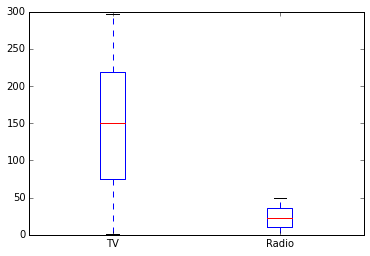

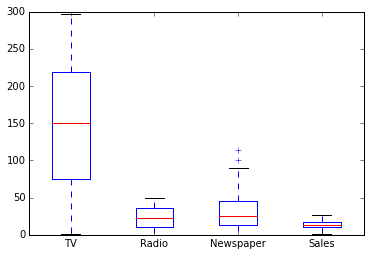

In [12]:
# Your boxplots, use double brackets for columns, nothing at all for all
data[['TV','Radio']].plot(kind = 'box')
data.plot(kind='box')

#### What do we learn from TV, Radio, Newspaper and Sales Box-plots?

Answer: TV and Radio are symmetrical, Newspaper is skewed and has outliers sales is peaked?

# Let's play with correlation

Find Correlations Matrix of your data and explain what you've learned from it. For instance, which variable can depict Sales the best? (TV, Radio or Newspaper). What is the highest and lowest correlation?  
hint: df.corr() returns Matrix of correlation


In [10]:
# your Corrolation code shall be written here:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


What did you learn from correlation Matrix?
Answer: TV is most correlated with Sales

# Let's get rid of outliers.

First: Look over your box-plots and pick one variable that likely has outliers.

Second: Find Interquartile Range (IQR) of that variable. You can do this in two different ways. 
    - Use df.describe()
    - Use df.quantile()
Third: Remember, one definition of outliers is anything that is more than 1.5*IQR above Q3 or 1.5QR below Q1 (For this example solely focus on 1.5*IQR above Q3)
Fourth: delete the outlier rows.

#### Which Variable seems to have outliers?

Answer: Newspapers

In [34]:
# Before you start check how many observations are in your DataFrame
data.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [45]:
#Step 2 Let's find IQR
iqr=data["Newspaper"].quantile(.75) - data["Newspaper"].quantile(.25)
bfence = data["Newspaper"].quantile(.25)-iqr*1.5
tfence = data["Newspaper"].quantile(.75)+iqr*1.5
print bfence
print tfence

-35.775
93.625


In [46]:
#mtcars.drop(mtcars[mtcars.mpg < 20].index, inplace = True)

data.drop(data[data.Newspaper>tfence].index, inplace = True) 
data.drop(data[data.Newspaper<bfence].index, inplace = True) 


TV           198
Radio        198
Newspaper    198
Sales        198
dtype: int64

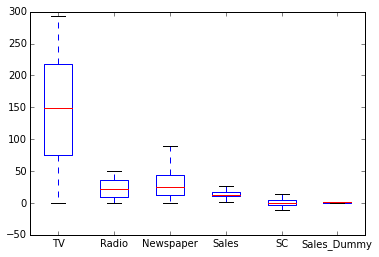

In [74]:
# Check the length of your data and see if you have correctly dropped outliers.
data.plot(kind='box')

# Your last mission!

Our goal is to divide our dataset to High Sales and Low Sales. We would like to add a dummy variable called Sales_Dummy which is 0 if Sales of that specific observation is less than Median of all Sales and is 1 if sales is more than median of Sales.

In [ ]:
"""
We can do it in shorter steps - but for education purposes, first define a variable called 
SalesCategory which is Low when Sales is less than Median and High otherwise. 
""


In [ ]:
"""
We can define a new Variable called SalesDummy that serves our purpose. Let's call our
Dummy Variable, Sales_Dummy. Please use .map()
"""


In [65]:
a=data.Sales.median()
print a

data['SalesCategory']=np.where(data.Sales-a<0, 'Low', 'High')
data.head()

12.9


,TV,Radio,Newspaper,Sales,SalesCategory,SC
1,230.1,37.8,69.2,22.1,High,9.2
2,44.5,39.3,45.1,10.4,Low,-2.5
3,17.2,45.9,69.3,9.3,Low,-3.6
4,151.5,41.3,58.5,18.5,High,5.6
5,180.8,10.8,58.4,12.9,High,0.0


In [71]:
data['Sales_Dummy'] = data['SalesCategory'].map({'Low':0, 'High':1})
data.head()

,TV,Radio,Newspaper,Sales,SalesCategory,SC,Sales_Dummy
1,230.1,37.8,69.2,22.1,High,9.2,1
2,44.5,39.3,45.1,10.4,Low,-2.5,0
3,17.2,45.9,69.3,9.3,Low,-3.6,0
4,151.5,41.3,58.5,18.5,High,5.6,1
5,180.8,10.8,58.4,12.9,High,0.0,1
